<h2 style="text-align:center;">Simple Linear Regression - Salary Prediction</h2>

### 🎯 Objective
In this notebook, we will build a **Simple Linear Regression (SLR)** model to predict an employee's salary based on their years of experience.

---

### 📂 Steps Covered
1. Load & explore dataset  
2. Split into train & test sets  
3. Train the SLR model  
4. Visualize training & test results  
5. Evaluate model performance  
6. Save trained model for deployment  

---

**Dataset:** `Salary_Data.csv` (30 records, 2 columns → YearsExperience & Salary)  


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Display plots inline
%matplotlib inline


<h2 style="text-align:center;">Step 1: Load Dataset</h2>

We will load the **Salary_Data.csv** file from the `data/` folder and check the structure.


In [2]:
# Load dataset
dataset = pd.read_csv("../data/Salary_Data.csv")

# Display first 5 rows
print("Dataset Preview:")
display(dataset.head())

# Dataset info
print("\nDataset Info:")
print(dataset.info())

# Shape of dataset
print("\nDataset Shape:", dataset.shape)


Dataset Preview:


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None

Dataset Shape: (30, 2)


<h2 style="text-align:center;">Step 2: Feature Selection</h2>

We will separate the dataset into:
- **Independent variable (X):** Years of Experience  
- **Dependent variable (y):** Salary  


In [3]:
# Independent variable (YearsExperience)
X = dataset.iloc[:, :-1].values  

# Dependent variable (Salary)
y = dataset.iloc[:, -1].values  

print("Feature Sample (X):", X[:5])
print("Target Sample (y):", y[:5])


Feature Sample (X): [[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
Target Sample (y): [39343 46205 37731 43525 39891]


<h2 style="text-align:center;">Step 3: Train-Test Split</h2>

We will split the dataset into:
- **Training set (80%)**
- **Testing set (20%)**

This ensures the model is trained on one set and evaluated on unseen data.


In [4]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (24, 1) (24,)
Testing set shape: (6, 1) (6,)


<h2 style="text-align:center;">Step 4: Train the Simple Linear Regression Model</h2>


In [5]:
# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Model trained successfully ✅")
print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_)


Model trained successfully ✅
Intercept: 26780.09915062818
Coefficient: [9312.57512673]


<h2 style="text-align:center;">Step 5: Predictions & Visualization</h2>

We will:
1. Predict salaries for the test set  
2. Compare actual vs predicted values  
3. Visualize the regression line on both training & test sets  



Comparison (Actual vs Predicted):


,Actual,Predicted
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


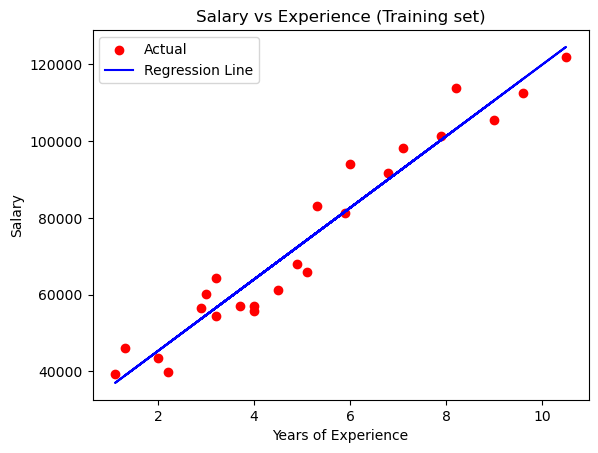

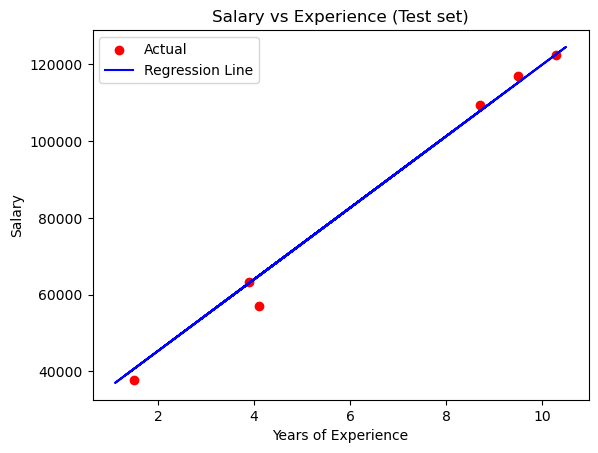

In [6]:
# Predicting test set results
y_pred = regressor.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nComparison (Actual vs Predicted):")
display(comparison)

# Visualize Training set
plt.scatter(X_train, y_train, color='red', label="Actual")
plt.plot(X_train, regressor.predict(X_train), color='blue', label="Regression Line")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Visualize Test set
plt.scatter(X_test, y_test, color='red', label="Actual")
plt.plot(X_train, regressor.predict(X_train), color='blue', label="Regression Line")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()


<h2 style="text-align:center;">Step 6: Model Evaluation</h2>

We will evaluate the model using:
- **Mean Squared Error (MSE)**
- **R² Score (Coefficient of Determination)**


In [7]:
# Evaluation metrics
train_pred = regressor.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, y_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")


Training MSE: 36149670.12
Testing MSE: 12823412.30
Training R² Score: 0.94
Testing R² Score: 0.99


<h2 style="text-align:center;">Step 7: Save the Model</h2>

We will save the trained model as a `.pkl` file in the `models/` folder using **pickle**.  
This will be later used in a Streamlit app for deployment.


In [8]:
# Save trained model
model_path = "../models/linear_regression_model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(regressor, file)

print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: ../models/linear_regression_model.pkl
